## 5.5 Homework: 
Calculate the following integral based on three different rules

$$\int_0^3 (x^2-x+1 dx)$$

$$\int_0^3 (x^4-x+1 dx)$$

$$\int_0^3 \text{exp}(-x^2) dx$$

For the 1st one, how many sampling points do you need for Simpson rule?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Function definitions
def prob1(x):
    return (x*x - x + 1)

def prob2(x):
    return (x**4 - x + 1)

def prob3(x):
    return (np.exp(-x*x))


In [90]:
#integral definitions
def Rectangle(f, start, end, parts, plot=1):
    """
    Rectrangle sum rule
    
    Modified from lec_5
    """
    #define the function
#     f = lambda x: x * x  
    
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = resultsy[i] * deltax
    

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        #plt.xlim([start,end])
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        #plt.bar(resultsx, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

#------------------------------------------------------------------------

def Trapezoid(f, start, end, parts, plot=1):
    """
    Trapezoid sum rule
    
    """
    #define the function
#     f = lambda x: x * x  
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.xlim([start,end])
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)        
        
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

#--------------------------------------------------------------------------------------

def Simpson(f, start, end, parts, plot=1):
    """
    Simpson sum rule
    
    """
    #define the function
#     f = lambda x: x**4 - 2*x + 1
    
    #define the X, Y points 
    deltax = (end - start) / parts  # h in Simpson's rule
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    #-----------------------------------------------------
    #define the Simpson points and calculate the area here
    #-----------------------------------------------------
    area = np.zeros(int(parts/2))
    i = 0
    for j in range(area.size):
        area[j] = (1/3)*deltax*(resultsy[i] + 4*resultsy[i+1] + resultsy[i+2])
        i += 2
         
    #By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        
        #-----------------------------------------------------
        #draw the curves based on Simpson points here
        #-----------------------------------------------------             
    
        plt.xlim([start,end])
        plt.ylim([min(y),max(y)])
        plt.show()
        
        print("The Sum of the area is: ", sum(area))
    
    return np.sum(area)

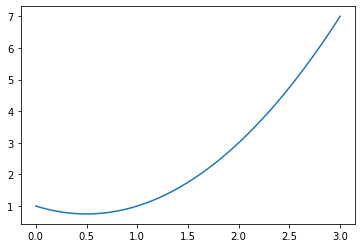

In [10]:
#Problem 1
x1 = np.linspace(0,3,100)
y1 = prob1(x1)

plt.plot(x1,y1)
plt.show()

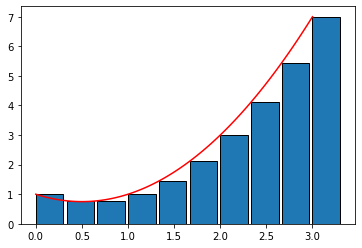

The Sum of the area is:  7.999999999999998


7.999999999999998

In [27]:
#rectangle

Rectangle(prob1,0,3,10)

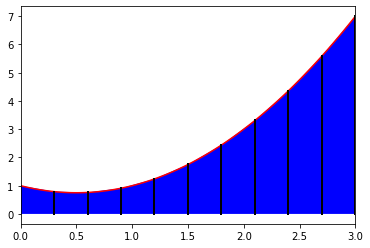

The Sum of the area is:  7.544999999999999


7.544999999999999

In [51]:
#Trapezoidal
Trapezoid(prob1,0,3,10)

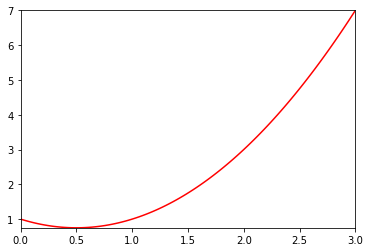

The Sum of the area is:  7.499999999999998


7.499999999999998

In [96]:
#simson
Simpson(prob1,0,3,10)

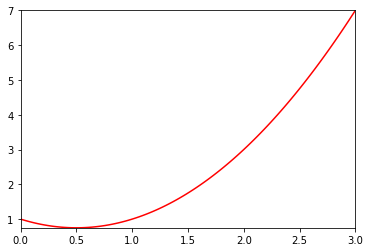

The Sum of the area is:  7.499999999999999


7.499999999999998

In [97]:
Simpson(prob1,0,3,100)

Problem 1 only needs about 10 points for simpson's rule to give an accurate result. However it can run 100 points very fast

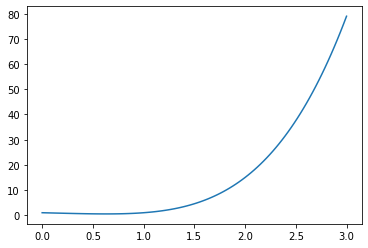

In [87]:
#Problem 2  #rectangle
x2 = np.linspace(0,3,100)
y2 = prob2(x2)

plt.plot(x2,y2)
plt.show()

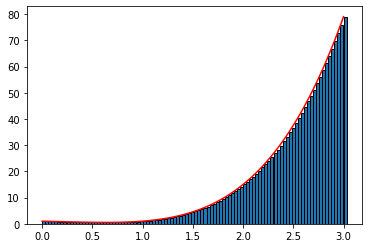

The Sum of the area is:  47.83718173470238


47.83718173470238

In [88]:
Rectangle(prob2,0,3,100)

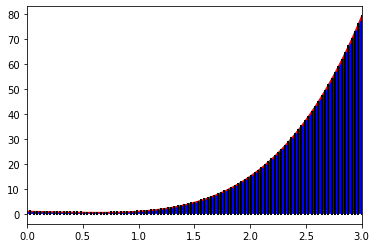

The Sum of the area is:  47.108099919


47.108099919

In [89]:
Trapezoid(prob2,0,3,100)

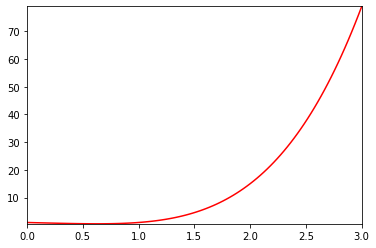

The Sum of the area is:  47.10000032399999


47.10000032399999

In [92]:
Simpson(prob2,0,3,100)

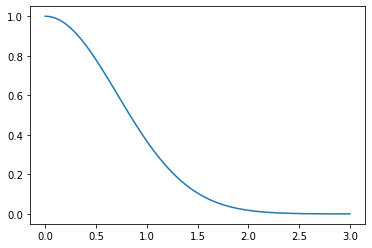

In [11]:
#Problem 3
x3 = np.linspace(0,3,100)
y3 = prob3(x3)

plt.plot(x3,y3)
plt.show()

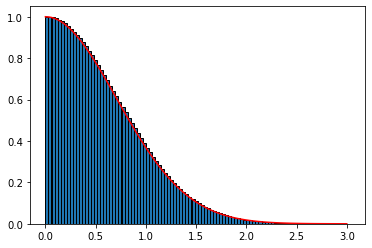

The Sum of the area is:  0.892347069854365


0.892347069854365

In [93]:
Rectangle(prob3,0,3,100)

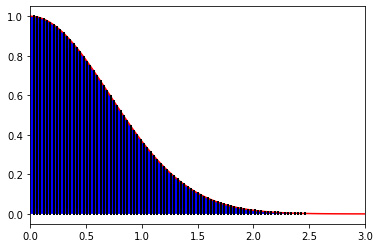

The Sum of the area is:  0.8862072927500886


0.8862072927500886

In [94]:
Trapezoid(prob3,0,3,100)

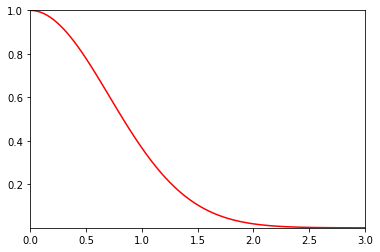

The Sum of the area is:  0.886207348159786


0.8862073481597859

In [95]:
Simpson(prob3,0,3,100)